## NN的組成

-

> ## 1. Input Layer
> - Weights

> ## 2. Hidden Layer
> - Net Input Function
> - Activation Function : 給神經元引入非線性因素，使得 神經網路能任意逼近任何非線性函數

> ## 3. Output Layer

> 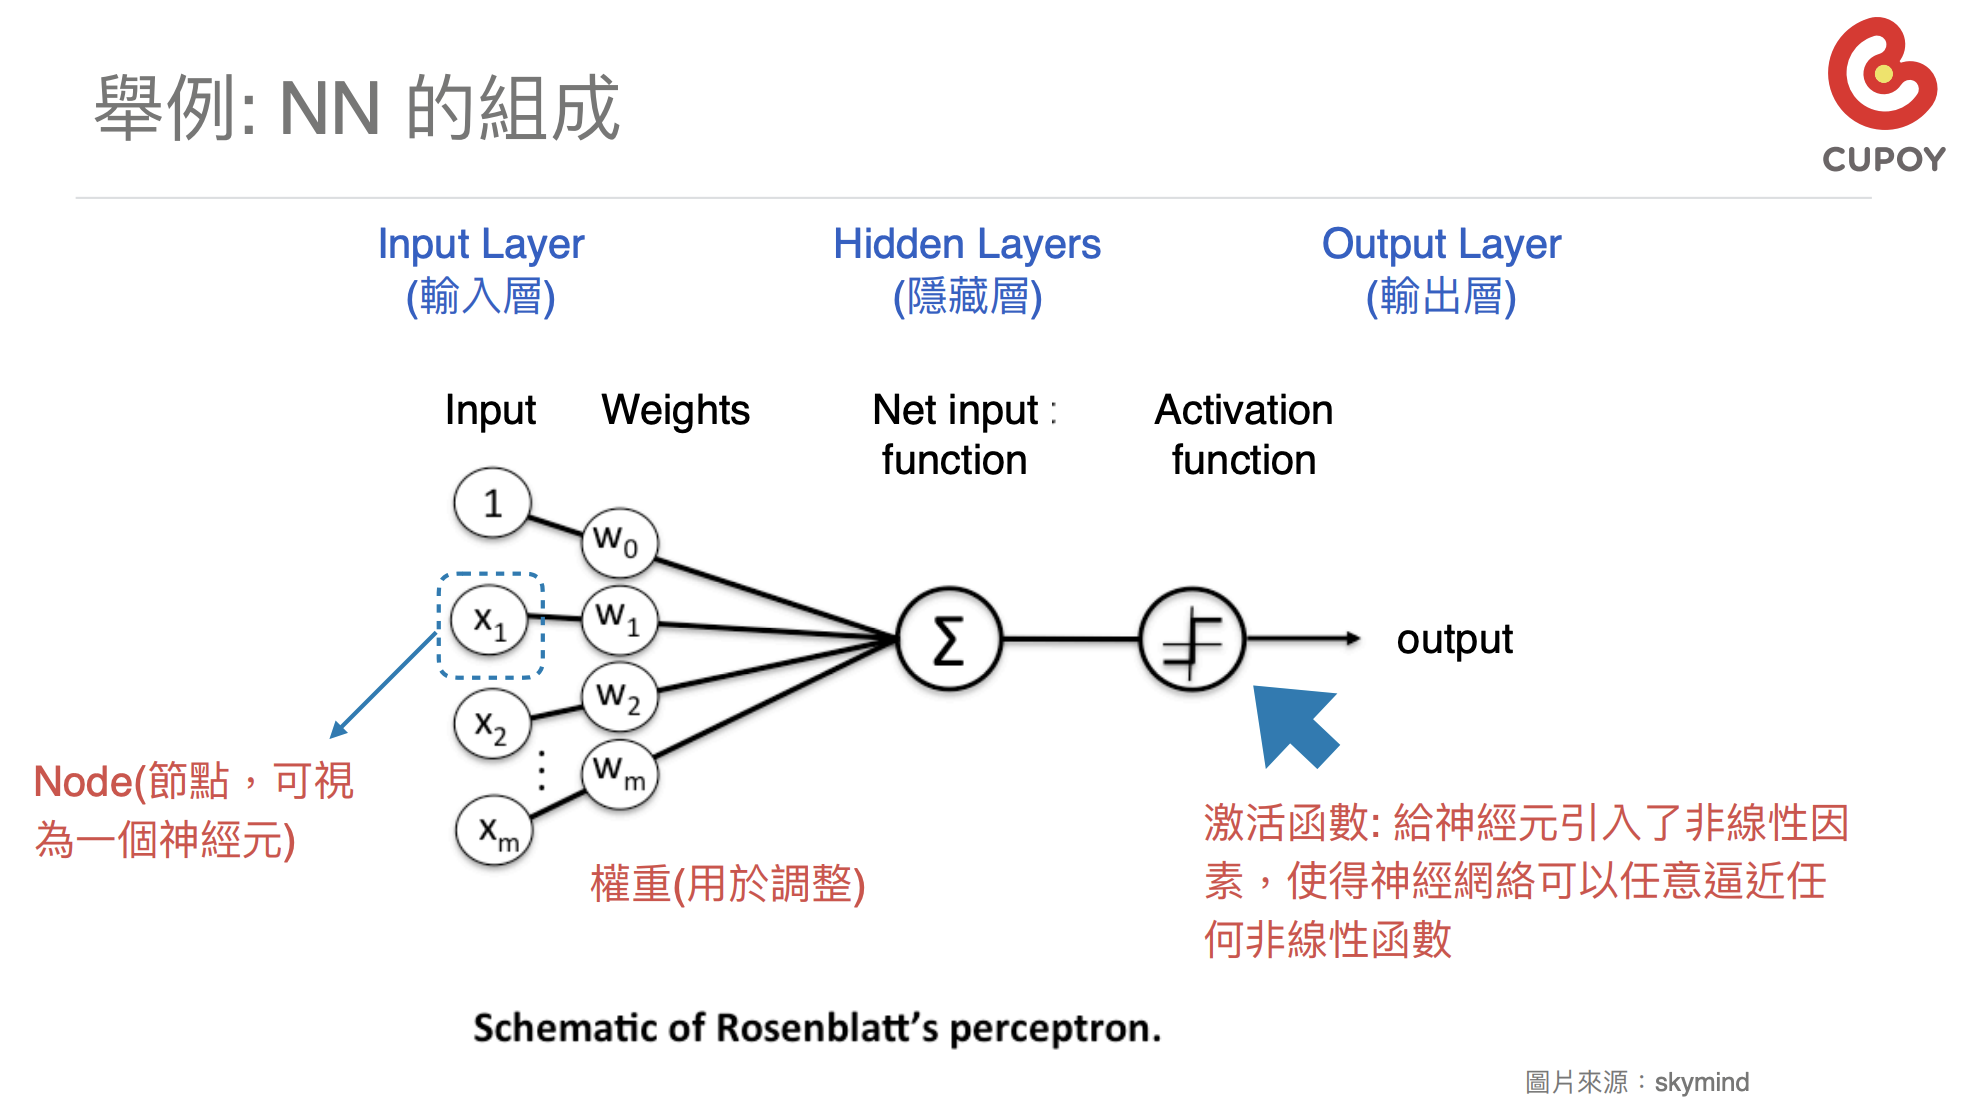


## 多層 Perceptron 的優缺點


## MLP 優點

> 建立 「非線性」 模型、 「real-time」 模型


## MLP 缺點

> 使用不同的初始權重，會讓驗證時的準確率浮動

> MLP 需要調整每層神經元數、層數、迭代次數

> 對於特徵預處理很敏感



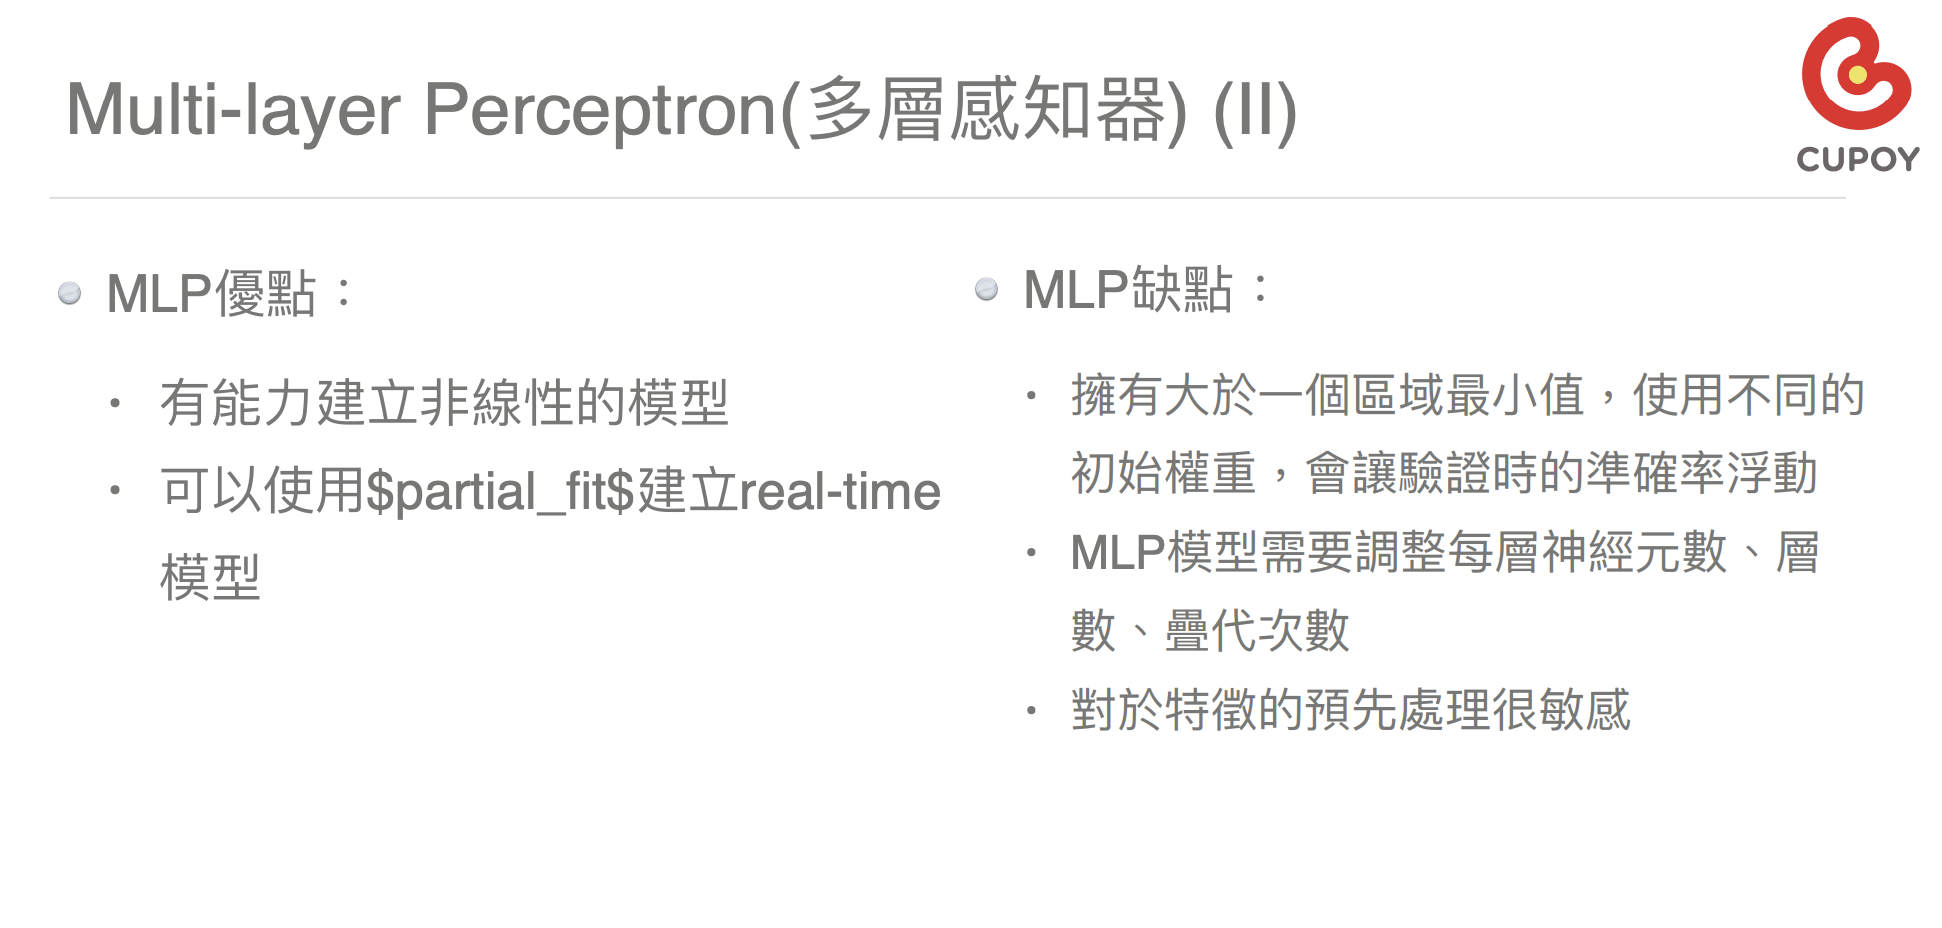

## 課程目標:

了解MLP 在神經網路上的應用

## 範例重點:

以Keras 自帶的 手寫辨識的數據集來說明 MLP 建構的網路模型

## 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist

(x_train_image,y_train_label), (x_test_image,y_test_label) = mnist.load_data()

11493376/11490434 [==============================] - 35s 3us/step


In [3]:
# 指定測試集與訓練資料集
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
# 把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

## 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
#宣告採用序列模型
model = Sequential()

#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

print(model.summary())

W0706 22:35:23.808357 4400162240 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0706 22:35:23.841690 4400162240 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


## 訓練模型

In [9]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

W0706 22:35:48.965607 4400162240 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0706 22:35:49.008454 4400162240 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [10]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

W0706 22:35:59.591258 4400162240 deprecation.py:323] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0706 22:35:59.643873 4400162240 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 93us/step - loss: 0.2693 - acc: 0.9225 - val_loss: 0.1334 - val_acc: 0.9605
Epoch 2/10
48000/48000 [==============================] - 3s 72us/step - loss: 0.1076 - acc: 0.9683 - val_loss: 0.1046 - val_acc: 0.9690
Epoch 3/10
48000/48000 [==============================] - 4s 80us/step - loss: 0.0709 - acc: 0.9785 - val_loss: 0.0940 - val_acc: 0.9723
Epoch 4/10
48000/48000 [==============================] - 4s 78us/step - loss: 0.0511 - acc: 0.9840 - val_loss: 0.0839 - val_acc: 0.9753
Epoch 5/10
48000/48000 [==============================] - 4s 73us/step - loss: 0.0370 - acc: 0.9882 - val_loss: 0.0792 - val_acc: 0.9763
Epoch 6/10
48000/48000 [==============================] - 4s 73us/step - loss: 0.0258 - acc: 0.9919 - val_loss: 0.0772 - val_acc: 0.9778
Epoch 7/10
48000/48000 [==============================] - 4s 84us/step - loss: 0.0200 - acc: 0.9940 - val_loss: 0.0887 - val_acc

## 以圖形顯示訓練過程

In [11]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

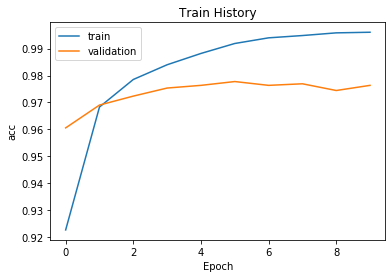

In [12]:
show_train_history(train_history,'acc','val_acc')

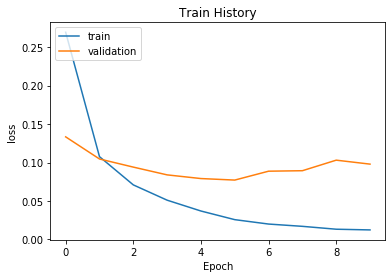

In [13]:
show_train_history(train_history,'loss','val_loss')

## 評估模型準確率

In [14]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 25us/step

accuracy= 0.9764
